<a href="https://colab.research.google.com/github/eunhyechoe/psyc60.github.io/blob/main/1_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Lab Exercise, Principles of Human Brain Mapping with fMRI (FA24)**
  
# **1. Data Visualization**
#### Plot time-series, response patterns, and functional connectivity profiles

## 0. Setup environment for Colab

Colab's virtual environment is temporary, so you need to install any non-default packages each time you run the script. Run the following cell first to set up the environment.

In [2]:
%%bash
pip install -U neuroboros

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.5 MB/s eta 0:00:00


## 1. Import Packages
Colab comes with pre-installed packages like `numpy` and `matplotlib`, so you can import them without installation. We also import `neuroboros` under the simplified alias `nb` for convenience.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, cdist, squareform
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

import neuroboros as nb

## 2. Import searchlight indices

The brain has a complex 3D structure. This can be simplified by representing its surface as a mesh of small triangles. Using the `nb.sls` function, you can extract coordinates from a spherical region on this surface mesh.

`nb.sls` returns the vertex indices for each searchlight as a list of `numpy` arrays. In this step, you will focus on the right hemisphere with a 15 mm radius, using the `onavg` (OpenNeuro Average) template at ico8 resolution.

In [4]:
# rh, radius = 15 mm
SLS_ico8_15mm_rh = nb.sls('r', 15, space='onavg-ico32', center_space='onavg-ico8', return_dists=False)

In [16]:
SLS_ico8_15mm_rh[0]

array([2525, 2288, 1652, 3359,  612, 2702, 9038,  834, 5731, 3319, 1204,
       9134, 7832, 3580, 7226, 6084, 6216, 6463,  559, 3358, 2458, 8225,
       9526, 6386, 8083, 6425, 9562,  543, 1496, 3221, 4587, 8871, 2832,
        261, 1199, 4456, 2622,  457, 2580, 4717, 2094,  477, 5238, 6443,
       3809, 8748, 5673,  951,  632, 3115, 6588, 6449, 5239, 4947, 2763,
       8649, 5864, 1084, 7738, 7697, 3902, 1896, 7597, 7803, 8342])

In [17]:
# rh, radius = 20 mm
SLS_ico8_20mm_rh, Dists_ico8_20mm_rh = \
nb.sls('r', 20, space='onavg-ico32', center_space='onavg-ico8', return_dists=True)

In [29]:
len(SLS_ico8_20mm_rh)

607

In [18]:
SLS_ico8_20mm_rh[0]

array([2525, 2288, 1652, 3359,  612, 2702, 9038,  834, 5731, 3319, 1204,
       9134, 7832, 3580, 7226, 6084, 6216, 6463,  559, 3358, 2458, 8225,
       9526, 6386, 8083, 6425, 9562,  543, 1496, 3221, 4587, 8871, 2832,
        261, 1199, 4456, 2622,  457, 2580, 4717, 2094,  477, 5238, 6443,
       3809, 8748, 5673,  951,  632, 3115, 6588, 6449, 5239, 4947, 2763,
       8649, 5864, 1084, 7738, 7697, 3902, 1896, 7597, 7803, 8342, 4031,
       3755, 2816, 5293, 3266, 8072, 8900, 4980, 4062, 1135, 6240, 1643,
       7081, 3043, 4278,  828, 5368, 6082, 4089, 7420, 9470, 2402, 5182,
       7804, 1875,  847, 2829, 2605, 8192, 7133, 6826, 3837, 1289, 7688,
       1870, 3638,  931, 2501,  734, 6857, 3608, 6460, 1285, 5462, 6866,
       7732, 4137, 8624, 4448, 8875, 7433, 5081, 2203, 6698, 7878])

In [13]:
Dists_ico8_20mm_rh[0]

array([ 1.48304748,  2.61258366,  3.10141759,  3.79217634,  4.28802939,
        4.66836696,  5.00587528,  5.06798309,  5.78989275,  6.0200985 ,
        6.30125702,  6.52689231,  7.13159626,  7.22800534,  7.6159596 ,
        7.7545429 ,  7.82747705,  7.89624676,  8.30505792,  8.9456715 ,
        9.01621693,  9.01687952,  9.06264802,  9.30359958,  9.34427125,
        9.39392963,  9.70150306, 10.09029469, 10.09837002, 10.09868217,
       10.46477979, 10.61984395, 10.68497179, 10.79628171, 10.9601238 ,
       11.26284889, 11.29768772, 11.66229336, 11.77852963, 11.8703167 ,
       11.89513777, 11.99629971, 12.25345858, 12.32949468, 12.35896225,
       12.50638884, 12.6020951 , 12.64712111, 13.02348511, 13.51964008,
       13.57076944, 13.57143343, 13.63020304, 13.63695249, 13.72485909,
       13.92477888, 14.04287915, 14.05583613, 14.07672766, 14.11625699,
       14.25560668, 14.33358632, 14.35914417, 14.44420532, 14.98008685,
       15.02910766, 15.17206928, 15.35882542, 15.38019842, 15.41

## 3. Load the data

We will load the [StudyForrest](https://www.studyforrest.org/) data in `numpy` format using the `neuroboros` package. For detailed explanations of the code, refer to the [Neuroboros](https://neuroboros.github.io/tutorials/neuroimaging_data_matrix.html) tutorial.

In [21]:
dset = nb.Forrest()
sids = dset.subjects
type(sids), len(sids)

(list, 15)

In [22]:
sids[:3]

['01', '02', '03']

We set the first subject ID of the list to `sid`, and get the data as `dm` for the following parameters: `l`eft hemisphere, from the `1`st run of the `forrest` task, for `sid`.

In [23]:
sid = sids[0]
dm = dset.get_data(sid, 'forrest', 1, 'l')

In [25]:
type(dm), dm.dtype

(numpy.ndarray, dtype('float64'))

In [26]:
dm.shape

(451, 9675)

## 4. Plot Time-series
Each row of the data represents the time points (TR), and the columns correspond to the cortical vertices (9675). You can plot a response time series of a cortical vertex. Here, we can plot one for the first vertex index.

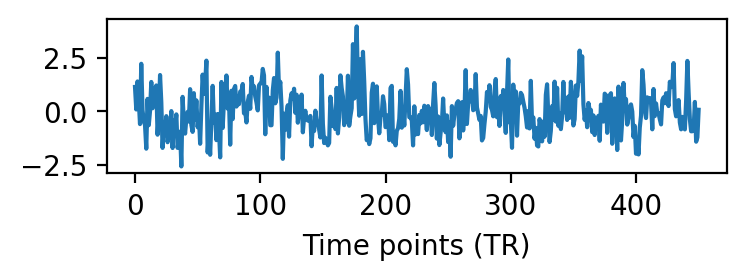

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(4, 1), dpi=200)
ax.plot(dm[:, 0])
ax.set_xlabel('Time points (TR)')
plt.show()

## 5. Plot Response Pattern
You can also check the spatial response pattern for a specific time point, for example, TR = 0.

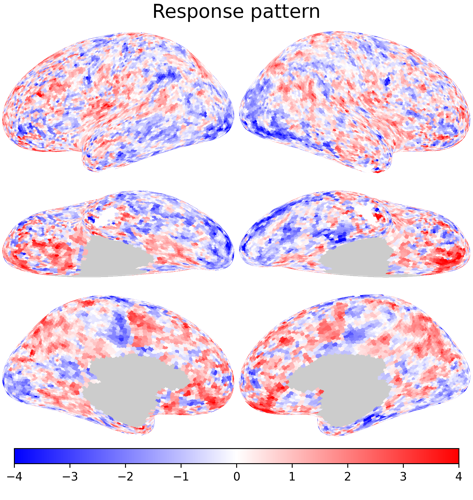

In [30]:
nb.plot([dm[0], dset.get_data(sid, 'forrest', 1, 'r')[0]],
       cmap='bwr', vmax=4, vmin=-4, title='Response pattern')

calculate searchlight means for one ico8 searchlight (262 for FFA)

In [39]:
# lh, radius = 20 mm
sls = nb.sls('l', radius=20)
type(sls), len(sls)

(list, 9675)

In [40]:
type(sls[0]), len(sls[0])

(numpy.ndarray, 119)

The first vertex has 119 vertex indices of the searchlight.

In [41]:
sls[0]

array([   0, 1488, 1885, 6595,  409, 1341, 6012,  799, 8350, 8080, 8972,
       8813, 5883,  845, 1683, 2143, 9587, 8816, 4977, 1161, 3872, 3728,
        868, 8798,  263, 2180, 7757, 6766, 3021, 3807, 4512, 6800, 3145,
       7768, 1748, 8105, 7597, 6797, 6950, 1631, 2997, 8907, 3637, 5618,
       9403, 7879, 4972, 2389, 2419, 2878, 3903, 3822, 1688,  785, 6271,
       1193, 1635, 9372, 7258, 3701, 5629, 8811, 7840, 2023, 4493, 1705,
       1685, 2865, 2039, 7608, 5351, 7648,  929, 2784, 6093, 3219, 8630,
       4402, 8240, 6872, 3699, 9557, 2279, 2289, 3897, 2131, 1978, 5433,
       9262, 6507, 3094, 4408, 4838, 3154, 9132, 3905,  666, 9590, 8898,
       2899, 3123, 7918, 7789, 1944, 9645, 1493, 2651, 4028,  441, 4855,
         94, 2941, 3842, 9272, 4794, 5934, 6901, 9409, 5739])

We can extract the data for the first searchlight.

In [42]:
sl_dm = dm[:, sls[0]]
sl_dm.shape

(451, 119)

## 6. Funcional Connectivity Profile

We can also quantify how brain regions are synchronized in time series by computing functional connectivity between two vertices using the Pearson correlation along the time series.

In [62]:
dm.shape

(451, 9675)

To simplify the calculation, we downsample the data matrix from ico32 resolution to ico8 resolution.

In [44]:
xfm = nb.mapping('l', 'onavg-ico32', 'onavg-ico8', mask=True)
xfm.shape

In [52]:
dm_ico32 = dm
dm_ico8 = dm_ico32 @ xfm

In [54]:
print(dm_ico32.shape, xfm.shape, dm_ico8.shape)

(451, 9675) (9675, 603) (451, 603)


Now the data consist of a total of 603 vertices. By calculating the correlation along the time series for all pairs of vertices, we can generate the connectivity matrix.

In [60]:
d = pdist(dm_ico8.T, 'correlation')
mat = 1 - squareform(d)
print(d.shape, mat.shape)

(181503,) (603, 603)


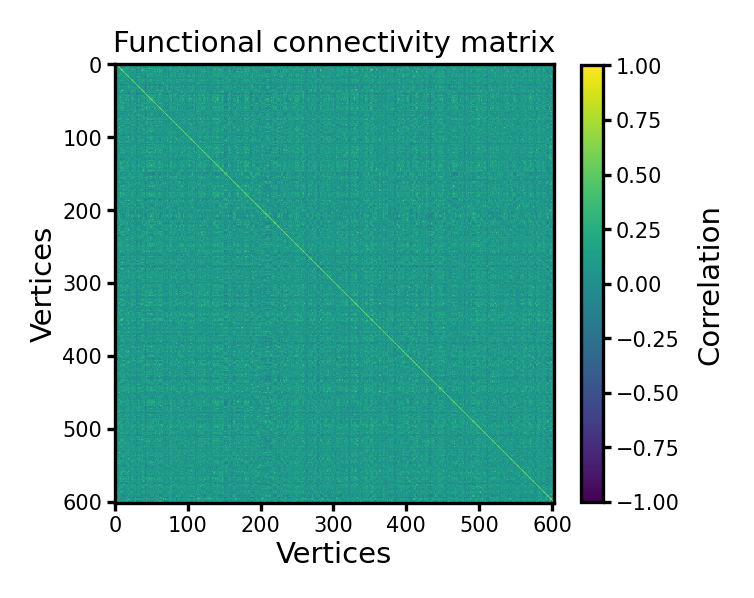

In [61]:
fig, ax = plt.subplots(1, 1, figsize=[_/2.54 for _ in [6, 6]], dpi=300)
im = ax.imshow(mat, vmax=1, vmin=-1, cmap='viridis')

ax.set_title('Functional connectivity matrix', size=7, pad=3)
ax.tick_params('both', labelsize=5, size=2, pad=1)
ax.set_xlabel('Vertices', size=7, labelpad=1)
ax.set_ylabel('Vertices', size=7, labelpad=1)
cb = fig.colorbar(im, ax=ax, shrink=0.8)
cb.ax.tick_params(labelsize=5, size=2, pad=1)
cb.ax.set_ylabel('Correlation', size=7)
plt.show()